# Poker Hand Classification

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## PREPARE DATA

In [32]:
#Load data
train = pd.read_csv("Dataset/poker-hand-testing.data",header = None)
test = pd.read_csv("Dataset/poker-hand-training-true.data",header = None)

In [33]:
#Info about dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
0     1000000 non-null int64
1     1000000 non-null int64
2     1000000 non-null int64
3     1000000 non-null int64
4     1000000 non-null int64
5     1000000 non-null int64
6     1000000 non-null int64
7     1000000 non-null int64
8     1000000 non-null int64
9     1000000 non-null int64
10    1000000 non-null int64
dtypes: int64(11)
memory usage: 83.9 MB


In [34]:
#Grab features
train_features = train.values[:,:-1]
test_features = test.values[:,:-1]
#Grab labels
train_labels = train.values[:,-1]
test_labels = test.values[:,-1]
#Grab 20 samples to predict
predict_features = train_features[100000:100020]
predict_labels = train_labels[100000:100020]
#Take only 50000 samples to train
train_features = train_features[:50000]
train_labels = train_labels[:50000]

In [35]:
train_features.shape

(50000, 10)

In [36]:
test_features.shape

(25010, 10)

In [37]:
predict_features.shape

(20, 10)

## CREATE MODEL

In [38]:
#Number of neurons in each layers
Input = 10
L1 = 200
L2 = 100
L3 = 60
L4 = 30
Output = 10

In [72]:
#Placeholders
X = tf.placeholder(tf.float32, [None, Input])
Y_true = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

In [73]:
#Weights and biases
W1 = tf.Variable(tf.truncated_normal([Input, L1], stddev=0.1))
b1 = tf.Variable(tf.zeros([L1]))

W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
b2 = tf.Variable(tf.zeros([L2]))

W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
b3 = tf.Variable(tf.zeros([L3]))

W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1))
b4 = tf.Variable(tf.zeros([L4]))

W5 = tf.Variable(tf.truncated_normal([L4, Output], stddev=0.1))
b5 = tf.Variable(tf.zeros([Output]))

In [74]:
#Create layers with dropout
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Y1 = tf.nn.dropout(Y1, keep_prob)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y2 = tf.nn.dropout(Y2, keep_prob)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y3 = tf.nn.dropout(Y3, keep_prob)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
Y4 = tf.nn.dropout(Y4, keep_prob)

#Softmax
Ylogits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Ylogits)

In [75]:
#Loss function
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_true)
cross_entropy = tf.reduce_mean(cross_entropy)
                                                          
#Accuracy
correct_prediction = tf.equal(tf.argmax(Y, 1), Y_true)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
#Optimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)

## TRAIN MODEL

In [76]:
#Epochs and batch size
num_epochs = 300
batchsize=5000

#Init global variables
init = tf.global_variables_initializer()

#Empty lists to plots
train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()
pred = list()

#Create session
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for i in range(0,len(train_features),batchsize):
            batch_X_train =train_features[i:i+batchsize]
            batch_Y_train =train_labels[i:i+batchsize]
            
            #Two lines to visualization data (not to training)
            acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X_train, Y_true: batch_Y_train, keep_prob: 1.0})
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: test_features, Y_true: test_labels, keep_prob: 1.0})
            
            #Print statistics
            print("epoch{0} #{1} Trn acc={2:2.3f} , Trn loss={3:3.3f} Tst acc={4:2.3f}, Tst loss={5:3.3f}".format(epoch,i,acc_trn,loss_trn,acc_tst,loss_tst))
            
            #Add acc and loss to lists
            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)
            
            #TRAIN MODEL
            sess.run(train_step, feed_dict={X: batch_X_train, Y_true: batch_Y_train, keep_prob: 0.75})
            
    #At the end predict 20 samples
    y_pred = sess.run(tf.argmax(Y, 1), feed_dict={X: predict_features, keep_prob: 1.0})

epoch0 #0 Trn acc=0.023 , Trn loss=2.305 Tst acc=0.021, Tst loss=2.306
epoch0 #5000 Trn acc=0.505 , Trn loss=1.928 Tst acc=0.491, Tst loss=1.930
epoch0 #10000 Trn acc=0.498 , Trn loss=1.608 Tst acc=0.500, Tst loss=1.607
epoch0 #15000 Trn acc=0.500 , Trn loss=1.297 Tst acc=0.499, Tst loss=1.296
epoch0 #20000 Trn acc=0.499 , Trn loss=1.100 Tst acc=0.499, Tst loss=1.105
epoch0 #25000 Trn acc=0.510 , Trn loss=1.060 Tst acc=0.499, Tst loss=1.070
epoch0 #30000 Trn acc=0.488 , Trn loss=1.107 Tst acc=0.500, Tst loss=1.090
epoch0 #35000 Trn acc=0.503 , Trn loss=1.102 Tst acc=0.500, Tst loss=1.092
epoch0 #40000 Trn acc=0.497 , Trn loss=1.061 Tst acc=0.500, Tst loss=1.070
epoch0 #45000 Trn acc=0.501 , Trn loss=1.049 Tst acc=0.500, Tst loss=1.039
epoch1 #0 Trn acc=0.503 , Trn loss=1.020 Tst acc=0.500, Tst loss=1.012
epoch1 #5000 Trn acc=0.516 , Trn loss=1.010 Tst acc=0.500, Tst loss=1.000
epoch1 #10000 Trn acc=0.497 , Trn loss=1.010 Tst acc=0.500, Tst loss=1.006
epoch1 #15000 Trn acc=0.500 , Trn l

epoch11 #10000 Trn acc=0.497 , Trn loss=0.970 Tst acc=0.500, Tst loss=0.971
epoch11 #15000 Trn acc=0.500 , Trn loss=0.955 Tst acc=0.500, Tst loss=0.970
epoch11 #20000 Trn acc=0.499 , Trn loss=0.968 Tst acc=0.500, Tst loss=0.969
epoch11 #25000 Trn acc=0.510 , Trn loss=0.949 Tst acc=0.500, Tst loss=0.969
epoch11 #30000 Trn acc=0.488 , Trn loss=0.972 Tst acc=0.500, Tst loss=0.968
epoch11 #35000 Trn acc=0.504 , Trn loss=0.967 Tst acc=0.500, Tst loss=0.969
epoch11 #40000 Trn acc=0.498 , Trn loss=0.966 Tst acc=0.501, Tst loss=0.971
epoch11 #45000 Trn acc=0.503 , Trn loss=0.973 Tst acc=0.502, Tst loss=0.971
epoch12 #0 Trn acc=0.506 , Trn loss=0.979 Tst acc=0.502, Tst loss=0.970
epoch12 #5000 Trn acc=0.516 , Trn loss=0.974 Tst acc=0.501, Tst loss=0.968
epoch12 #10000 Trn acc=0.497 , Trn loss=0.967 Tst acc=0.500, Tst loss=0.968
epoch12 #15000 Trn acc=0.500 , Trn loss=0.952 Tst acc=0.500, Tst loss=0.968
epoch12 #20000 Trn acc=0.499 , Trn loss=0.967 Tst acc=0.500, Tst loss=0.968
epoch12 #25000 Tr

epoch22 #10000 Trn acc=0.540 , Trn loss=0.950 Tst acc=0.542, Tst loss=0.952
epoch22 #15000 Trn acc=0.541 , Trn loss=0.937 Tst acc=0.539, Tst loss=0.953
epoch22 #20000 Trn acc=0.541 , Trn loss=0.948 Tst acc=0.537, Tst loss=0.953
epoch22 #25000 Trn acc=0.547 , Trn loss=0.931 Tst acc=0.542, Tst loss=0.952
epoch22 #30000 Trn acc=0.538 , Trn loss=0.949 Tst acc=0.546, Tst loss=0.951
epoch22 #35000 Trn acc=0.559 , Trn loss=0.947 Tst acc=0.551, Tst loss=0.951
epoch22 #40000 Trn acc=0.556 , Trn loss=0.945 Tst acc=0.558, Tst loss=0.952
epoch22 #45000 Trn acc=0.556 , Trn loss=0.952 Tst acc=0.557, Tst loss=0.950
epoch23 #0 Trn acc=0.559 , Trn loss=0.959 Tst acc=0.550, Tst loss=0.949
epoch23 #5000 Trn acc=0.555 , Trn loss=0.953 Tst acc=0.549, Tst loss=0.949
epoch23 #10000 Trn acc=0.542 , Trn loss=0.948 Tst acc=0.546, Tst loss=0.950
epoch23 #15000 Trn acc=0.544 , Trn loss=0.937 Tst acc=0.545, Tst loss=0.952
epoch23 #20000 Trn acc=0.547 , Trn loss=0.947 Tst acc=0.545, Tst loss=0.952
epoch23 #25000 Tr

epoch33 #25000 Trn acc=0.561 , Trn loss=0.914 Tst acc=0.562, Tst loss=0.935
epoch33 #30000 Trn acc=0.555 , Trn loss=0.931 Tst acc=0.558, Tst loss=0.935
epoch33 #35000 Trn acc=0.573 , Trn loss=0.929 Tst acc=0.562, Tst loss=0.934
epoch33 #40000 Trn acc=0.570 , Trn loss=0.927 Tst acc=0.566, Tst loss=0.935
epoch33 #45000 Trn acc=0.568 , Trn loss=0.938 Tst acc=0.568, Tst loss=0.935
epoch34 #0 Trn acc=0.570 , Trn loss=0.943 Tst acc=0.566, Tst loss=0.933
epoch34 #5000 Trn acc=0.572 , Trn loss=0.935 Tst acc=0.565, Tst loss=0.932
epoch34 #10000 Trn acc=0.553 , Trn loss=0.929 Tst acc=0.558, Tst loss=0.932
epoch34 #15000 Trn acc=0.562 , Trn loss=0.915 Tst acc=0.560, Tst loss=0.932
epoch34 #20000 Trn acc=0.562 , Trn loss=0.923 Tst acc=0.561, Tst loss=0.932
epoch34 #25000 Trn acc=0.560 , Trn loss=0.912 Tst acc=0.563, Tst loss=0.932
epoch34 #30000 Trn acc=0.560 , Trn loss=0.927 Tst acc=0.560, Tst loss=0.931
epoch34 #35000 Trn acc=0.571 , Trn loss=0.926 Tst acc=0.562, Tst loss=0.931
epoch34 #40000 Tr

epoch44 #45000 Trn acc=0.583 , Trn loss=0.906 Tst acc=0.588, Tst loss=0.903
epoch45 #0 Trn acc=0.583 , Trn loss=0.914 Tst acc=0.582, Tst loss=0.904
epoch45 #5000 Trn acc=0.588 , Trn loss=0.906 Tst acc=0.584, Tst loss=0.903
epoch45 #10000 Trn acc=0.584 , Trn loss=0.901 Tst acc=0.585, Tst loss=0.903
epoch45 #15000 Trn acc=0.582 , Trn loss=0.885 Tst acc=0.584, Tst loss=0.903
epoch45 #20000 Trn acc=0.580 , Trn loss=0.892 Tst acc=0.577, Tst loss=0.904
epoch45 #25000 Trn acc=0.581 , Trn loss=0.880 Tst acc=0.579, Tst loss=0.902
epoch45 #30000 Trn acc=0.582 , Trn loss=0.895 Tst acc=0.582, Tst loss=0.901
epoch45 #35000 Trn acc=0.596 , Trn loss=0.895 Tst acc=0.591, Tst loss=0.901
epoch45 #40000 Trn acc=0.585 , Trn loss=0.891 Tst acc=0.590, Tst loss=0.900
epoch45 #45000 Trn acc=0.577 , Trn loss=0.904 Tst acc=0.579, Tst loss=0.902
epoch46 #0 Trn acc=0.580 , Trn loss=0.912 Tst acc=0.578, Tst loss=0.903
epoch46 #5000 Trn acc=0.594 , Trn loss=0.904 Tst acc=0.590, Tst loss=0.902
epoch46 #10000 Trn acc

epoch56 #10000 Trn acc=0.616 , Trn loss=0.859 Tst acc=0.621, Tst loss=0.856
epoch56 #15000 Trn acc=0.627 , Trn loss=0.836 Tst acc=0.624, Tst loss=0.856
epoch56 #20000 Trn acc=0.628 , Trn loss=0.845 Tst acc=0.622, Tst loss=0.855
epoch56 #25000 Trn acc=0.628 , Trn loss=0.828 Tst acc=0.619, Tst loss=0.854
epoch56 #30000 Trn acc=0.618 , Trn loss=0.845 Tst acc=0.619, Tst loss=0.853
epoch56 #35000 Trn acc=0.635 , Trn loss=0.838 Tst acc=0.629, Tst loss=0.850
epoch56 #40000 Trn acc=0.622 , Trn loss=0.841 Tst acc=0.628, Tst loss=0.850
epoch56 #45000 Trn acc=0.618 , Trn loss=0.851 Tst acc=0.622, Tst loss=0.852
epoch57 #0 Trn acc=0.633 , Trn loss=0.853 Tst acc=0.628, Tst loss=0.850
epoch57 #5000 Trn acc=0.634 , Trn loss=0.852 Tst acc=0.633, Tst loss=0.852
epoch57 #10000 Trn acc=0.615 , Trn loss=0.857 Tst acc=0.622, Tst loss=0.856
epoch57 #15000 Trn acc=0.611 , Trn loss=0.839 Tst acc=0.614, Tst loss=0.859
epoch57 #20000 Trn acc=0.628 , Trn loss=0.846 Tst acc=0.619, Tst loss=0.856
epoch57 #25000 Tr

epoch67 #30000 Trn acc=0.686 , Trn loss=0.768 Tst acc=0.689, Tst loss=0.776
epoch67 #35000 Trn acc=0.681 , Trn loss=0.766 Tst acc=0.689, Tst loss=0.776
epoch67 #40000 Trn acc=0.687 , Trn loss=0.761 Tst acc=0.699, Tst loss=0.769
epoch67 #45000 Trn acc=0.689 , Trn loss=0.763 Tst acc=0.698, Tst loss=0.765
epoch68 #0 Trn acc=0.695 , Trn loss=0.763 Tst acc=0.697, Tst loss=0.764
epoch68 #5000 Trn acc=0.700 , Trn loss=0.760 Tst acc=0.699, Tst loss=0.763
epoch68 #10000 Trn acc=0.678 , Trn loss=0.766 Tst acc=0.684, Tst loss=0.768
epoch68 #15000 Trn acc=0.708 , Trn loss=0.736 Tst acc=0.695, Tst loss=0.761
epoch68 #20000 Trn acc=0.693 , Trn loss=0.751 Tst acc=0.692, Tst loss=0.761
epoch68 #25000 Trn acc=0.697 , Trn loss=0.736 Tst acc=0.696, Tst loss=0.758
epoch68 #30000 Trn acc=0.684 , Trn loss=0.754 Tst acc=0.691, Tst loss=0.759
epoch68 #35000 Trn acc=0.704 , Trn loss=0.741 Tst acc=0.704, Tst loss=0.754
epoch68 #40000 Trn acc=0.692 , Trn loss=0.750 Tst acc=0.696, Tst loss=0.759
epoch68 #45000 Tr

epoch79 #0 Trn acc=0.718 , Trn loss=0.699 Tst acc=0.722, Tst loss=0.697
epoch79 #5000 Trn acc=0.731 , Trn loss=0.681 Tst acc=0.735, Tst loss=0.686
epoch79 #10000 Trn acc=0.733 , Trn loss=0.679 Tst acc=0.735, Tst loss=0.687
epoch79 #15000 Trn acc=0.738 , Trn loss=0.661 Tst acc=0.741, Tst loss=0.683
epoch79 #20000 Trn acc=0.719 , Trn loss=0.687 Tst acc=0.729, Tst loss=0.693
epoch79 #25000 Trn acc=0.739 , Trn loss=0.670 Tst acc=0.735, Tst loss=0.689
epoch79 #30000 Trn acc=0.742 , Trn loss=0.674 Tst acc=0.742, Tst loss=0.681
epoch79 #35000 Trn acc=0.746 , Trn loss=0.664 Tst acc=0.748, Tst loss=0.680
epoch79 #40000 Trn acc=0.744 , Trn loss=0.667 Tst acc=0.747, Tst loss=0.679
epoch79 #45000 Trn acc=0.728 , Trn loss=0.694 Tst acc=0.729, Tst loss=0.697
epoch80 #0 Trn acc=0.739 , Trn loss=0.681 Tst acc=0.742, Tst loss=0.682
epoch80 #5000 Trn acc=0.745 , Trn loss=0.677 Tst acc=0.744, Tst loss=0.680
epoch80 #10000 Trn acc=0.736 , Trn loss=0.673 Tst acc=0.743, Tst loss=0.677
epoch80 #15000 Trn acc

epoch90 #0 Trn acc=0.771 , Trn loss=0.596 Tst acc=0.771, Tst loss=0.600
epoch90 #5000 Trn acc=0.791 , Trn loss=0.580 Tst acc=0.784, Tst loss=0.588
epoch90 #10000 Trn acc=0.791 , Trn loss=0.575 Tst acc=0.790, Tst loss=0.584
epoch90 #15000 Trn acc=0.792 , Trn loss=0.562 Tst acc=0.791, Tst loss=0.581
epoch90 #20000 Trn acc=0.782 , Trn loss=0.576 Tst acc=0.787, Tst loss=0.579
epoch90 #25000 Trn acc=0.789 , Trn loss=0.557 Tst acc=0.785, Tst loss=0.577
epoch90 #30000 Trn acc=0.775 , Trn loss=0.574 Tst acc=0.781, Tst loss=0.581
epoch90 #35000 Trn acc=0.804 , Trn loss=0.546 Tst acc=0.797, Tst loss=0.566
epoch90 #40000 Trn acc=0.794 , Trn loss=0.557 Tst acc=0.796, Tst loss=0.571
epoch90 #45000 Trn acc=0.786 , Trn loss=0.575 Tst acc=0.785, Tst loss=0.584
epoch91 #0 Trn acc=0.788 , Trn loss=0.571 Tst acc=0.790, Tst loss=0.573
epoch91 #5000 Trn acc=0.799 , Trn loss=0.560 Tst acc=0.792, Tst loss=0.569
epoch91 #10000 Trn acc=0.786 , Trn loss=0.565 Tst acc=0.786, Tst loss=0.572
epoch91 #15000 Trn acc

epoch101 #20000 Trn acc=0.846 , Trn loss=0.472 Tst acc=0.850, Tst loss=0.477
epoch101 #25000 Trn acc=0.855 , Trn loss=0.461 Tst acc=0.849, Tst loss=0.480
epoch101 #30000 Trn acc=0.830 , Trn loss=0.489 Tst acc=0.834, Tst loss=0.495
epoch101 #35000 Trn acc=0.853 , Trn loss=0.467 Tst acc=0.846, Tst loss=0.485
epoch101 #40000 Trn acc=0.844 , Trn loss=0.475 Tst acc=0.846, Tst loss=0.484
epoch101 #45000 Trn acc=0.843 , Trn loss=0.467 Tst acc=0.847, Tst loss=0.478
epoch102 #0 Trn acc=0.845 , Trn loss=0.475 Tst acc=0.846, Tst loss=0.476
epoch102 #5000 Trn acc=0.840 , Trn loss=0.475 Tst acc=0.839, Tst loss=0.485
epoch102 #10000 Trn acc=0.828 , Trn loss=0.485 Tst acc=0.835, Tst loss=0.489
epoch102 #15000 Trn acc=0.847 , Trn loss=0.455 Tst acc=0.847, Tst loss=0.475
epoch102 #20000 Trn acc=0.824 , Trn loss=0.488 Tst acc=0.831, Tst loss=0.493
epoch102 #25000 Trn acc=0.856 , Trn loss=0.459 Tst acc=0.852, Tst loss=0.475
epoch102 #30000 Trn acc=0.856 , Trn loss=0.465 Tst acc=0.856, Tst loss=0.473
epoc

epoch112 #15000 Trn acc=0.864 , Trn loss=0.403 Tst acc=0.866, Tst loss=0.423
epoch112 #20000 Trn acc=0.867 , Trn loss=0.416 Tst acc=0.865, Tst loss=0.426
epoch112 #25000 Trn acc=0.885 , Trn loss=0.393 Tst acc=0.878, Tst loss=0.415
epoch112 #30000 Trn acc=0.879 , Trn loss=0.412 Tst acc=0.875, Tst loss=0.422
epoch112 #35000 Trn acc=0.875 , Trn loss=0.409 Tst acc=0.865, Tst loss=0.432
epoch112 #40000 Trn acc=0.857 , Trn loss=0.422 Tst acc=0.860, Tst loss=0.434
epoch112 #45000 Trn acc=0.870 , Trn loss=0.412 Tst acc=0.872, Tst loss=0.421
epoch113 #0 Trn acc=0.877 , Trn loss=0.411 Tst acc=0.877, Tst loss=0.415
epoch113 #5000 Trn acc=0.876 , Trn loss=0.407 Tst acc=0.878, Tst loss=0.415
epoch113 #10000 Trn acc=0.857 , Trn loss=0.423 Tst acc=0.860, Tst loss=0.431
epoch113 #15000 Trn acc=0.871 , Trn loss=0.392 Tst acc=0.872, Tst loss=0.410
epoch113 #20000 Trn acc=0.850 , Trn loss=0.432 Tst acc=0.848, Tst loss=0.441
epoch113 #25000 Trn acc=0.876 , Trn loss=0.399 Tst acc=0.870, Tst loss=0.419
epoc

epoch123 #20000 Trn acc=0.897 , Trn loss=0.337 Tst acc=0.894, Tst loss=0.350
epoch123 #25000 Trn acc=0.881 , Trn loss=0.369 Tst acc=0.877, Tst loss=0.386
epoch123 #30000 Trn acc=0.894 , Trn loss=0.346 Tst acc=0.894, Tst loss=0.358
epoch123 #35000 Trn acc=0.903 , Trn loss=0.336 Tst acc=0.898, Tst loss=0.356
epoch123 #40000 Trn acc=0.890 , Trn loss=0.350 Tst acc=0.895, Tst loss=0.361
epoch123 #45000 Trn acc=0.898 , Trn loss=0.340 Tst acc=0.899, Tst loss=0.350
epoch124 #0 Trn acc=0.902 , Trn loss=0.334 Tst acc=0.901, Tst loss=0.343
epoch124 #5000 Trn acc=0.898 , Trn loss=0.337 Tst acc=0.895, Tst loss=0.344
epoch124 #10000 Trn acc=0.895 , Trn loss=0.336 Tst acc=0.895, Tst loss=0.342
epoch124 #15000 Trn acc=0.884 , Trn loss=0.345 Tst acc=0.887, Tst loss=0.360
epoch124 #20000 Trn acc=0.906 , Trn loss=0.325 Tst acc=0.905, Tst loss=0.335
epoch124 #25000 Trn acc=0.907 , Trn loss=0.329 Tst acc=0.902, Tst loss=0.346
epoch124 #30000 Trn acc=0.896 , Trn loss=0.348 Tst acc=0.897, Tst loss=0.356
epoc

epoch134 #10000 Trn acc=0.937 , Trn loss=0.250 Tst acc=0.933, Tst loss=0.254
epoch134 #15000 Trn acc=0.937 , Trn loss=0.230 Tst acc=0.934, Tst loss=0.250
epoch134 #20000 Trn acc=0.938 , Trn loss=0.236 Tst acc=0.935, Tst loss=0.250
epoch134 #25000 Trn acc=0.937 , Trn loss=0.242 Tst acc=0.931, Tst loss=0.261
epoch134 #30000 Trn acc=0.935 , Trn loss=0.240 Tst acc=0.933, Tst loss=0.250
epoch134 #35000 Trn acc=0.942 , Trn loss=0.228 Tst acc=0.934, Tst loss=0.250
epoch134 #40000 Trn acc=0.931 , Trn loss=0.236 Tst acc=0.930, Tst loss=0.251
epoch134 #45000 Trn acc=0.928 , Trn loss=0.244 Tst acc=0.926, Tst loss=0.254
epoch135 #0 Trn acc=0.931 , Trn loss=0.248 Tst acc=0.925, Tst loss=0.259
epoch135 #5000 Trn acc=0.931 , Trn loss=0.248 Tst acc=0.929, Tst loss=0.253
epoch135 #10000 Trn acc=0.933 , Trn loss=0.249 Tst acc=0.932, Tst loss=0.251
epoch135 #15000 Trn acc=0.932 , Trn loss=0.236 Tst acc=0.929, Tst loss=0.255
epoch135 #20000 Trn acc=0.938 , Trn loss=0.234 Tst acc=0.934, Tst loss=0.247
epoc

epoch145 #0 Trn acc=0.943 , Trn loss=0.237 Tst acc=0.943, Tst loss=0.241
epoch145 #5000 Trn acc=0.936 , Trn loss=0.239 Tst acc=0.934, Tst loss=0.245
epoch145 #10000 Trn acc=0.939 , Trn loss=0.231 Tst acc=0.942, Tst loss=0.236
epoch145 #15000 Trn acc=0.958 , Trn loss=0.206 Tst acc=0.950, Tst loss=0.229
epoch145 #20000 Trn acc=0.962 , Trn loss=0.206 Tst acc=0.957, Tst loss=0.218
epoch145 #25000 Trn acc=0.964 , Trn loss=0.201 Tst acc=0.958, Tst loss=0.216
epoch145 #30000 Trn acc=0.947 , Trn loss=0.217 Tst acc=0.949, Tst loss=0.224
epoch145 #35000 Trn acc=0.958 , Trn loss=0.200 Tst acc=0.951, Tst loss=0.219
epoch145 #40000 Trn acc=0.948 , Trn loss=0.211 Tst acc=0.946, Tst loss=0.225
epoch145 #45000 Trn acc=0.942 , Trn loss=0.222 Tst acc=0.941, Tst loss=0.232
epoch146 #0 Trn acc=0.952 , Trn loss=0.213 Tst acc=0.947, Tst loss=0.220
epoch146 #5000 Trn acc=0.954 , Trn loss=0.213 Tst acc=0.953, Tst loss=0.216
epoch146 #10000 Trn acc=0.959 , Trn loss=0.202 Tst acc=0.961, Tst loss=0.208
epoch146 

epoch155 #40000 Trn acc=0.975 , Trn loss=0.167 Tst acc=0.971, Tst loss=0.184
epoch155 #45000 Trn acc=0.979 , Trn loss=0.168 Tst acc=0.977, Tst loss=0.178
epoch156 #0 Trn acc=0.977 , Trn loss=0.171 Tst acc=0.976, Tst loss=0.178
epoch156 #5000 Trn acc=0.966 , Trn loss=0.178 Tst acc=0.970, Tst loss=0.184
epoch156 #10000 Trn acc=0.977 , Trn loss=0.165 Tst acc=0.976, Tst loss=0.178
epoch156 #15000 Trn acc=0.984 , Trn loss=0.155 Tst acc=0.978, Tst loss=0.176
epoch156 #20000 Trn acc=0.984 , Trn loss=0.161 Tst acc=0.981, Tst loss=0.172
epoch156 #25000 Trn acc=0.988 , Trn loss=0.154 Tst acc=0.983, Tst loss=0.171
epoch156 #30000 Trn acc=0.982 , Trn loss=0.160 Tst acc=0.980, Tst loss=0.172
epoch156 #35000 Trn acc=0.978 , Trn loss=0.159 Tst acc=0.973, Tst loss=0.176
epoch156 #40000 Trn acc=0.980 , Trn loss=0.154 Tst acc=0.976, Tst loss=0.171
epoch156 #45000 Trn acc=0.975 , Trn loss=0.162 Tst acc=0.974, Tst loss=0.173
epoch157 #0 Trn acc=0.978 , Trn loss=0.164 Tst acc=0.975, Tst loss=0.170
epoch157

epoch166 #30000 Trn acc=0.994 , Trn loss=0.108 Tst acc=0.994, Tst loss=0.118
epoch166 #35000 Trn acc=0.993 , Trn loss=0.105 Tst acc=0.991, Tst loss=0.122
epoch166 #40000 Trn acc=0.993 , Trn loss=0.104 Tst acc=0.991, Tst loss=0.122
epoch166 #45000 Trn acc=0.991 , Trn loss=0.111 Tst acc=0.990, Tst loss=0.123
epoch167 #0 Trn acc=0.989 , Trn loss=0.121 Tst acc=0.989, Tst loss=0.126
epoch167 #5000 Trn acc=0.991 , Trn loss=0.117 Tst acc=0.990, Tst loss=0.123
epoch167 #10000 Trn acc=0.989 , Trn loss=0.117 Tst acc=0.988, Tst loss=0.126
epoch167 #15000 Trn acc=0.991 , Trn loss=0.107 Tst acc=0.988, Tst loss=0.126
epoch167 #20000 Trn acc=0.992 , Trn loss=0.114 Tst acc=0.989, Tst loss=0.125
epoch167 #25000 Trn acc=0.992 , Trn loss=0.109 Tst acc=0.989, Tst loss=0.125
epoch167 #30000 Trn acc=0.989 , Trn loss=0.115 Tst acc=0.989, Tst loss=0.126
epoch167 #35000 Trn acc=0.990 , Trn loss=0.111 Tst acc=0.986, Tst loss=0.130
epoch167 #40000 Trn acc=0.990 , Trn loss=0.111 Tst acc=0.989, Tst loss=0.127
epoc

epoch177 #20000 Trn acc=0.990 , Trn loss=0.143 Tst acc=0.990, Tst loss=0.152
epoch177 #25000 Trn acc=0.995 , Trn loss=0.134 Tst acc=0.991, Tst loss=0.151
epoch177 #30000 Trn acc=0.988 , Trn loss=0.143 Tst acc=0.990, Tst loss=0.151
epoch177 #35000 Trn acc=0.991 , Trn loss=0.130 Tst acc=0.991, Tst loss=0.147
epoch177 #40000 Trn acc=0.992 , Trn loss=0.131 Tst acc=0.988, Tst loss=0.148
epoch177 #45000 Trn acc=0.987 , Trn loss=0.136 Tst acc=0.987, Tst loss=0.148
epoch178 #0 Trn acc=0.988 , Trn loss=0.142 Tst acc=0.988, Tst loss=0.146
epoch178 #5000 Trn acc=0.989 , Trn loss=0.140 Tst acc=0.990, Tst loss=0.144
epoch178 #10000 Trn acc=0.992 , Trn loss=0.138 Tst acc=0.990, Tst loss=0.146
epoch178 #15000 Trn acc=0.991 , Trn loss=0.130 Tst acc=0.990, Tst loss=0.147
epoch178 #20000 Trn acc=0.993 , Trn loss=0.130 Tst acc=0.993, Tst loss=0.139
epoch178 #25000 Trn acc=0.996 , Trn loss=0.124 Tst acc=0.992, Tst loss=0.141
epoch178 #30000 Trn acc=0.987 , Trn loss=0.138 Tst acc=0.985, Tst loss=0.146
epoc

epoch188 #10000 Trn acc=0.993 , Trn loss=0.116 Tst acc=0.994, Tst loss=0.125
epoch188 #15000 Trn acc=0.997 , Trn loss=0.102 Tst acc=0.994, Tst loss=0.122
epoch188 #20000 Trn acc=0.995 , Trn loss=0.110 Tst acc=0.995, Tst loss=0.119
epoch188 #25000 Trn acc=0.997 , Trn loss=0.103 Tst acc=0.995, Tst loss=0.118
epoch188 #30000 Trn acc=0.995 , Trn loss=0.107 Tst acc=0.995, Tst loss=0.116
epoch188 #35000 Trn acc=0.996 , Trn loss=0.099 Tst acc=0.995, Tst loss=0.116
epoch188 #40000 Trn acc=0.997 , Trn loss=0.099 Tst acc=0.995, Tst loss=0.116
epoch188 #45000 Trn acc=0.995 , Trn loss=0.103 Tst acc=0.994, Tst loss=0.115
epoch189 #0 Trn acc=0.993 , Trn loss=0.112 Tst acc=0.994, Tst loss=0.115
epoch189 #5000 Trn acc=0.994 , Trn loss=0.110 Tst acc=0.994, Tst loss=0.115
epoch189 #10000 Trn acc=0.995 , Trn loss=0.104 Tst acc=0.995, Tst loss=0.114
epoch189 #15000 Trn acc=0.997 , Trn loss=0.095 Tst acc=0.995, Tst loss=0.113
epoch189 #20000 Trn acc=0.996 , Trn loss=0.103 Tst acc=0.995, Tst loss=0.113
epoc

epoch199 #15000 Trn acc=0.988 , Trn loss=0.103 Tst acc=0.985, Tst loss=0.121
epoch199 #20000 Trn acc=0.996 , Trn loss=0.088 Tst acc=0.994, Tst loss=0.099
epoch199 #25000 Trn acc=0.996 , Trn loss=0.085 Tst acc=0.993, Tst loss=0.097
epoch199 #30000 Trn acc=0.992 , Trn loss=0.093 Tst acc=0.990, Tst loss=0.104
epoch199 #35000 Trn acc=0.994 , Trn loss=0.081 Tst acc=0.993, Tst loss=0.097
epoch199 #40000 Trn acc=0.996 , Trn loss=0.079 Tst acc=0.993, Tst loss=0.097
epoch199 #45000 Trn acc=0.993 , Trn loss=0.086 Tst acc=0.993, Tst loss=0.098
epoch200 #0 Trn acc=0.991 , Trn loss=0.099 Tst acc=0.991, Tst loss=0.105
epoch200 #5000 Trn acc=0.992 , Trn loss=0.094 Tst acc=0.993, Tst loss=0.098
epoch200 #10000 Trn acc=0.994 , Trn loss=0.091 Tst acc=0.993, Tst loss=0.102
epoch200 #15000 Trn acc=0.977 , Trn loss=0.125 Tst acc=0.973, Tst loss=0.150
epoch200 #20000 Trn acc=0.989 , Trn loss=0.110 Tst acc=0.986, Tst loss=0.126
epoch200 #25000 Trn acc=0.946 , Trn loss=0.239 Tst acc=0.942, Tst loss=0.259
epoc

epoch210 #25000 Trn acc=0.995 , Trn loss=0.077 Tst acc=0.993, Tst loss=0.091
epoch210 #30000 Trn acc=0.994 , Trn loss=0.082 Tst acc=0.993, Tst loss=0.091
epoch210 #35000 Trn acc=0.995 , Trn loss=0.071 Tst acc=0.993, Tst loss=0.088
epoch210 #40000 Trn acc=0.996 , Trn loss=0.070 Tst acc=0.993, Tst loss=0.087
epoch210 #45000 Trn acc=0.995 , Trn loss=0.075 Tst acc=0.994, Tst loss=0.087
epoch211 #0 Trn acc=0.994 , Trn loss=0.085 Tst acc=0.995, Tst loss=0.089
epoch211 #5000 Trn acc=0.994 , Trn loss=0.083 Tst acc=0.994, Tst loss=0.089
epoch211 #10000 Trn acc=0.995 , Trn loss=0.077 Tst acc=0.994, Tst loss=0.089
epoch211 #15000 Trn acc=0.997 , Trn loss=0.070 Tst acc=0.995, Tst loss=0.088
epoch211 #20000 Trn acc=0.995 , Trn loss=0.077 Tst acc=0.994, Tst loss=0.088
epoch211 #25000 Trn acc=0.995 , Trn loss=0.077 Tst acc=0.993, Tst loss=0.090
epoch211 #30000 Trn acc=0.994 , Trn loss=0.077 Tst acc=0.995, Tst loss=0.087
epoch211 #35000 Trn acc=0.997 , Trn loss=0.071 Tst acc=0.995, Tst loss=0.088
epoc

epoch221 #15000 Trn acc=0.997 , Trn loss=0.063 Tst acc=0.995, Tst loss=0.081
epoch221 #20000 Trn acc=0.995 , Trn loss=0.072 Tst acc=0.994, Tst loss=0.082
epoch221 #25000 Trn acc=0.997 , Trn loss=0.065 Tst acc=0.995, Tst loss=0.079
epoch221 #30000 Trn acc=0.995 , Trn loss=0.069 Tst acc=0.995, Tst loss=0.079
epoch221 #35000 Trn acc=0.994 , Trn loss=0.068 Tst acc=0.993, Tst loss=0.085
epoch221 #40000 Trn acc=0.996 , Trn loss=0.067 Tst acc=0.993, Tst loss=0.084
epoch221 #45000 Trn acc=0.994 , Trn loss=0.072 Tst acc=0.993, Tst loss=0.084
epoch222 #0 Trn acc=0.993 , Trn loss=0.079 Tst acc=0.994, Tst loss=0.082
epoch222 #5000 Trn acc=0.993 , Trn loss=0.078 Tst acc=0.992, Tst loss=0.085
epoch222 #10000 Trn acc=0.995 , Trn loss=0.071 Tst acc=0.994, Tst loss=0.081
epoch222 #15000 Trn acc=0.995 , Trn loss=0.064 Tst acc=0.993, Tst loss=0.082
epoch222 #20000 Trn acc=0.995 , Trn loss=0.072 Tst acc=0.993, Tst loss=0.083
epoch222 #25000 Trn acc=0.996 , Trn loss=0.070 Tst acc=0.994, Tst loss=0.083
epoc

epoch232 #30000 Trn acc=0.994 , Trn loss=0.086 Tst acc=0.993, Tst loss=0.096
epoch232 #35000 Trn acc=0.989 , Trn loss=0.091 Tst acc=0.986, Tst loss=0.111
epoch232 #40000 Trn acc=0.995 , Trn loss=0.076 Tst acc=0.992, Tst loss=0.095
epoch232 #45000 Trn acc=0.994 , Trn loss=0.081 Tst acc=0.993, Tst loss=0.093
epoch233 #0 Trn acc=0.992 , Trn loss=0.088 Tst acc=0.992, Tst loss=0.093
epoch233 #5000 Trn acc=0.993 , Trn loss=0.085 Tst acc=0.993, Tst loss=0.091
epoch233 #10000 Trn acc=0.993 , Trn loss=0.082 Tst acc=0.993, Tst loss=0.092
epoch233 #15000 Trn acc=0.997 , Trn loss=0.072 Tst acc=0.993, Tst loss=0.091
epoch233 #20000 Trn acc=0.994 , Trn loss=0.082 Tst acc=0.993, Tst loss=0.092
epoch233 #25000 Trn acc=0.995 , Trn loss=0.079 Tst acc=0.993, Tst loss=0.093
epoch233 #30000 Trn acc=0.988 , Trn loss=0.089 Tst acc=0.987, Tst loss=0.099
epoch233 #35000 Trn acc=0.994 , Trn loss=0.074 Tst acc=0.992, Tst loss=0.090
epoch233 #40000 Trn acc=0.995 , Trn loss=0.071 Tst acc=0.991, Tst loss=0.089
epoc

epoch243 #20000 Trn acc=0.994 , Trn loss=0.067 Tst acc=0.993, Tst loss=0.078
epoch243 #25000 Trn acc=0.995 , Trn loss=0.064 Tst acc=0.992, Tst loss=0.080
epoch243 #30000 Trn acc=0.995 , Trn loss=0.065 Tst acc=0.994, Tst loss=0.075
epoch243 #35000 Trn acc=0.997 , Trn loss=0.057 Tst acc=0.995, Tst loss=0.074
epoch243 #40000 Trn acc=0.997 , Trn loss=0.056 Tst acc=0.995, Tst loss=0.075
epoch243 #45000 Trn acc=0.996 , Trn loss=0.063 Tst acc=0.995, Tst loss=0.075
epoch244 #0 Trn acc=0.994 , Trn loss=0.071 Tst acc=0.995, Tst loss=0.076
epoch244 #5000 Trn acc=0.995 , Trn loss=0.071 Tst acc=0.995, Tst loss=0.076
epoch244 #10000 Trn acc=0.996 , Trn loss=0.064 Tst acc=0.995, Tst loss=0.075
epoch244 #15000 Trn acc=0.997 , Trn loss=0.056 Tst acc=0.995, Tst loss=0.074
epoch244 #20000 Trn acc=0.996 , Trn loss=0.062 Tst acc=0.995, Tst loss=0.073
epoch244 #25000 Trn acc=0.996 , Trn loss=0.059 Tst acc=0.995, Tst loss=0.072
epoch244 #30000 Trn acc=0.995 , Trn loss=0.063 Tst acc=0.995, Tst loss=0.072
epoc

epoch254 #10000 Trn acc=0.995 , Trn loss=0.080 Tst acc=0.994, Tst loss=0.091
epoch254 #15000 Trn acc=0.997 , Trn loss=0.073 Tst acc=0.993, Tst loss=0.094
epoch254 #20000 Trn acc=0.991 , Trn loss=0.086 Tst acc=0.991, Tst loss=0.095
epoch254 #25000 Trn acc=0.995 , Trn loss=0.072 Tst acc=0.993, Tst loss=0.086
epoch254 #30000 Trn acc=0.993 , Trn loss=0.071 Tst acc=0.993, Tst loss=0.082
epoch254 #35000 Trn acc=0.993 , Trn loss=0.065 Tst acc=0.992, Tst loss=0.081
epoch254 #40000 Trn acc=0.996 , Trn loss=0.061 Tst acc=0.993, Tst loss=0.080
epoch254 #45000 Trn acc=0.996 , Trn loss=0.067 Tst acc=0.994, Tst loss=0.078
epoch255 #0 Trn acc=0.994 , Trn loss=0.074 Tst acc=0.995, Tst loss=0.079
epoch255 #5000 Trn acc=0.994 , Trn loss=0.074 Tst acc=0.995, Tst loss=0.080
epoch255 #10000 Trn acc=0.996 , Trn loss=0.065 Tst acc=0.995, Tst loss=0.079
epoch255 #15000 Trn acc=0.997 , Trn loss=0.058 Tst acc=0.995, Tst loss=0.077
epoch255 #20000 Trn acc=0.996 , Trn loss=0.066 Tst acc=0.995, Tst loss=0.076
epoc

epoch265 #0 Trn acc=0.964 , Trn loss=0.127 Tst acc=0.965, Tst loss=0.131
epoch265 #5000 Trn acc=0.963 , Trn loss=0.132 Tst acc=0.968, Tst loss=0.133
epoch265 #10000 Trn acc=0.975 , Trn loss=0.116 Tst acc=0.975, Tst loss=0.130
epoch265 #15000 Trn acc=0.989 , Trn loss=0.093 Tst acc=0.984, Tst loss=0.113
epoch265 #20000 Trn acc=0.984 , Trn loss=0.097 Tst acc=0.984, Tst loss=0.107
epoch265 #25000 Trn acc=0.981 , Trn loss=0.100 Tst acc=0.974, Tst loss=0.118
epoch265 #30000 Trn acc=0.990 , Trn loss=0.098 Tst acc=0.989, Tst loss=0.107
epoch265 #35000 Trn acc=0.972 , Trn loss=0.110 Tst acc=0.974, Tst loss=0.126
epoch265 #40000 Trn acc=0.968 , Trn loss=0.114 Tst acc=0.967, Tst loss=0.131
epoch265 #45000 Trn acc=0.967 , Trn loss=0.125 Tst acc=0.970, Tst loss=0.130
epoch266 #0 Trn acc=0.967 , Trn loss=0.132 Tst acc=0.968, Tst loss=0.136
epoch266 #5000 Trn acc=0.962 , Trn loss=0.130 Tst acc=0.965, Tst loss=0.132
epoch266 #10000 Trn acc=0.961 , Trn loss=0.127 Tst acc=0.959, Tst loss=0.139
epoch266 

epoch275 #45000 Trn acc=0.996 , Trn loss=0.068 Tst acc=0.995, Tst loss=0.079
epoch276 #0 Trn acc=0.994 , Trn loss=0.076 Tst acc=0.995, Tst loss=0.080
epoch276 #5000 Trn acc=0.995 , Trn loss=0.074 Tst acc=0.995, Tst loss=0.080
epoch276 #10000 Trn acc=0.995 , Trn loss=0.067 Tst acc=0.995, Tst loss=0.080
epoch276 #15000 Trn acc=0.997 , Trn loss=0.061 Tst acc=0.995, Tst loss=0.080
epoch276 #20000 Trn acc=0.996 , Trn loss=0.070 Tst acc=0.995, Tst loss=0.080
epoch276 #25000 Trn acc=0.997 , Trn loss=0.067 Tst acc=0.995, Tst loss=0.081
epoch276 #30000 Trn acc=0.995 , Trn loss=0.069 Tst acc=0.995, Tst loss=0.081
epoch276 #35000 Trn acc=0.996 , Trn loss=0.063 Tst acc=0.994, Tst loss=0.081
epoch276 #40000 Trn acc=0.996 , Trn loss=0.062 Tst acc=0.994, Tst loss=0.081
epoch276 #45000 Trn acc=0.996 , Trn loss=0.069 Tst acc=0.995, Tst loss=0.080
epoch277 #0 Trn acc=0.994 , Trn loss=0.075 Tst acc=0.995, Tst loss=0.079
epoch277 #5000 Trn acc=0.995 , Trn loss=0.072 Tst acc=0.995, Tst loss=0.079
epoch277 

epoch286 #35000 Trn acc=0.996 , Trn loss=0.057 Tst acc=0.994, Tst loss=0.074
epoch286 #40000 Trn acc=0.997 , Trn loss=0.055 Tst acc=0.994, Tst loss=0.074
epoch286 #45000 Trn acc=0.996 , Trn loss=0.061 Tst acc=0.994, Tst loss=0.073
epoch287 #0 Trn acc=0.994 , Trn loss=0.066 Tst acc=0.995, Tst loss=0.071
epoch287 #5000 Trn acc=0.995 , Trn loss=0.064 Tst acc=0.995, Tst loss=0.071
epoch287 #10000 Trn acc=0.996 , Trn loss=0.056 Tst acc=0.995, Tst loss=0.069
epoch287 #15000 Trn acc=0.998 , Trn loss=0.050 Tst acc=0.995, Tst loss=0.070
epoch287 #20000 Trn acc=0.997 , Trn loss=0.058 Tst acc=0.995, Tst loss=0.069
epoch287 #25000 Trn acc=0.997 , Trn loss=0.054 Tst acc=0.995, Tst loss=0.069
epoch287 #30000 Trn acc=0.995 , Trn loss=0.057 Tst acc=0.994, Tst loss=0.069
epoch287 #35000 Trn acc=0.997 , Trn loss=0.052 Tst acc=0.994, Tst loss=0.070
epoch287 #40000 Trn acc=0.995 , Trn loss=0.057 Tst acc=0.991, Tst loss=0.077
epoch287 #45000 Trn acc=0.995 , Trn loss=0.060 Tst acc=0.994, Tst loss=0.071
epoc

epoch298 #0 Trn acc=0.994 , Trn loss=0.064 Tst acc=0.993, Tst loss=0.070
epoch298 #5000 Trn acc=0.992 , Trn loss=0.064 Tst acc=0.993, Tst loss=0.070
epoch298 #10000 Trn acc=0.994 , Trn loss=0.056 Tst acc=0.993, Tst loss=0.069
epoch298 #15000 Trn acc=0.997 , Trn loss=0.048 Tst acc=0.993, Tst loss=0.069
epoch298 #20000 Trn acc=0.995 , Trn loss=0.057 Tst acc=0.994, Tst loss=0.069
epoch298 #25000 Trn acc=0.996 , Trn loss=0.055 Tst acc=0.994, Tst loss=0.069
epoch298 #30000 Trn acc=0.995 , Trn loss=0.057 Tst acc=0.994, Tst loss=0.069
epoch298 #35000 Trn acc=0.996 , Trn loss=0.052 Tst acc=0.993, Tst loss=0.071
epoch298 #40000 Trn acc=0.996 , Trn loss=0.052 Tst acc=0.993, Tst loss=0.070
epoch298 #45000 Trn acc=0.994 , Trn loss=0.059 Tst acc=0.993, Tst loss=0.070
epoch299 #0 Trn acc=0.993 , Trn loss=0.067 Tst acc=0.994, Tst loss=0.072
epoch299 #5000 Trn acc=0.995 , Trn loss=0.064 Tst acc=0.995, Tst loss=0.070
epoch299 #10000 Trn acc=0.996 , Trn loss=0.057 Tst acc=0.995, Tst loss=0.070
epoch299 

## PREDICT LABELS

In [77]:
#Show predicted labels
print('True labels:', predict_labels)
print('Predicted labels:', y_pred)
print('\n What labels is equal:')
print(predict_labels == y_pred)

True labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0]
Predicted labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0]

 What labels is equal:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


## PLOTS

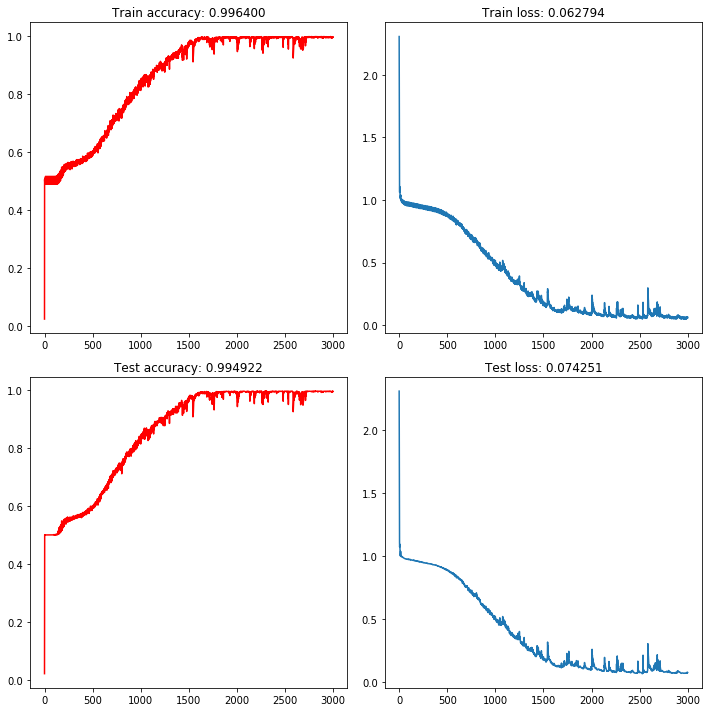

In [78]:
#Plots
fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
plt.title('Train accuracy: %f' %train_acc[-1])
plt.plot(range(len(train_acc)), train_acc, color='r')
plt.subplot(2,2,2)
plt.title('Train loss: %f' %train_losses[-1])
plt.plot(range(len(train_losses)), train_losses)
plt.subplot(2,2,3)
plt.title('Test accuracy: %f' %test_acc[-1])
plt.plot(range(len(test_acc)), test_acc, color='r')
plt.subplot(2,2,4)
plt.title('Test loss: %f' %test_losses[-1])
plt.plot(range(len(test_losses)), test_losses)
plt.tight_layout()